# Object Detection(객체 탐지)
<hr>

- 이미지 내에서 객체(물체)를 인식하는 방법<br>
<br>
    1. classification: 분류라고 불리는 전통적인 방법은 하나의 이미지를 입력으로 받아서 해당 이미지가 어떠한 <u>**class**</u>의 이미지인지 구분(예측하는) 것<br>
<br>
    2. localization: 지역화, 국소화라는 뜻을 가진 이 방법은 말그대로 객체가 있을만한 곳을 <u>**bounding box**</u>라고 하는 것을 통해 위치를 찾는(예측하는) 것
        - 위 1,2번은 공통적으로 하나의 이미지에 <u>**단일 객체**</u>에 대해서 작업을 수행함<br>
<br>
    3. object detection: 위 1,2번이 합쳐진 형태로, 객체의 위치와 클래스를 <u>**함께**</u> 찾는 두 가지의 작업을 수행하는 것
        - 위 1,2번과 다른점은 1,2번은 하나의 이미지에 <u>**단일 객체**</u>에 대한 작업이고, 객체 탐지(object detection)는 <u>**다수의 객체**</u>에 대한 작업<br>
<br>
    4. instance segmentation: 이미지 내에 각 객체를 <u>**픽셀 단위**</u>로 예측하는 작업을 수행하는 형태로, 객체 탐지에서 조금 더<br>
    발전된 형태의 작업을 수행하는 것
        - 추가적으로 sementic segmentation과 차이점은 <u>**군집화(clustering)**</u>이냐 <u>**개별적(individually)**</u>이냐의 차이<br>
<br>
- 객체 탐지의 두 가지 작업(Task)에 대한 세부사항<br>
<br>
    - localization(위치결정): 이미지 안에 존재하는 객체의 <u>**위치 정보**</u>를 경계상자(bounding box)를 통해 찾는 것
        - 위치 정보: 더 정확하게는 객체가 있을 것 같은 경계상자의 <u>**offset**</u>을 찾는 것<br>
        i.e., <u>**bounding box regression**</u><br>
<br>
    - Classification(분류): 해당 경계상자에 포함되어 있는 객체가 무엇인지 분류하는 것<br>
<br>
- 객체 탐지 알고리즘(Algorithm)의 종류
    - One Stage Detector(or Algorithm)
        - 위 두 작업을 한 번에 수행
        - 알고리즘: SSD(Single Shot Detection), YOLO(You Only Look Once) 등
        - 특징: two stage detectors에 비해 상대적으로 연산 속도가 빠르고, 정확도는 낮음
    - Two Stage Detector(or Algorithm)
        - 위 두 작업을 구분하여 수행
        - 알고리즘: R-CNN family(R-CNN, Fast R-CNN, Faster R-CNN, `Mask R-CNN`)
            - R-CNN: Region-based Convolutional Neural Network(영역 기반 합성곱 신경망)
            - `Mask R-CNN:` 객체 단위 탐지도 수행하지만 주 목적은 <u>**픽셀 단위**</u> Object Detection<br>
            즉, <u>**Image Instance Segmentation(이미지 분할)**</u>
        - 특징: one stage detectors에 비해 상대적으로 연산 속도가 느리고, 정확도는 높음
<hr>

- Region proposal(영역 제안)<br>
<br>
    - 물체가 있을 법한 위치(영역)를 찾는 과정을 뜻하며, 이러한 영역을 <u>**관심 영역**</u>(Region of interest, `ROI`)이라고 함<br>
<br>
    - 영역 제안 방법
        1. Sliding Window(미끄러지는 창)
            - 이미지내에서 다양한 형태의 <u>**윈도우(window)**</u> 혹은 <u>**커널(kernel)**</u>이 이미지 전체를 슬라이딩하며 물체가 존재하는지 확인함
            - 다만 너무 많은 영역에 대하여 확인해야 한다는 단점이 존재함. 특히 특징 맵이 아니라 입력 이미지 자체에 대해서 <u>**CPU**</u>를 이용해 슬라이딩을<br>
            진행하게 되면 넓은 입력 공간(input space)상에서 많은 영역에 대하여 확인해야 하므로 속도가 느릴수 있음
            - 반례로 <u>**Faster R-CNN(NIPS 2015)**</u>에서는 <u>**CPU**</u>가 아닌 <u>**GPU**</u>에서 이 작업을 수행하도록 작성되어 속도 측면에서 비약적인 발전을 이룸
        2. Selective Search(선택적 탐색)
            - 인접한 영역끼리 <u>**유사성(similarity)**</u>을 측정해 작은 영역에서 큰 영역으로 점진적으로 통합해 나감
            - 이러한 방법은 <u>**R-CNN(CVPR 2014)**</u>과 <u>**Fast R-CNN(ICCV 2015)**</u>에서 사용됨
            - 기본적으로 이 방법은 <u>**CPU**</u>에서 동작하도록 라이브러리에 작성되어 있기 때문에 한 장의 이미지에 대해서 <u>**약 2초 가량**</u>의 시간이 소요될 수 있음
<hr>

- Object Detection(객체 검출) 성능 평가 지표<br>
<br>
    - Jaccard Overlap(or Intersection over Union, <u>**IoU**</u>)<br>
<br>
        - IoU란 두 bounding boxes가 <u>**겹치는 비율(정도)**</u>을 의미
            - <img src="../markdown/intersection_over_union.png" width="400">
            - IoU가 주로 사용되는 경우 -> 정답 지표 & NMS 계산
                - 정답 지표 예시: <u>**mAP@0.5**</u> -> multi class에 대한 AP(Average Precision)들의 평균(Mean)을 구할 때 정답과 예측의 <u>**IoU = 0.5**</u>를<br>
                <u>**임계점(Threshold)**</u>으로 하여 그 이상의 값에 해당하는 것을 정답으로 판정하겠다는 의미
                - NMS 계산 예시: 같은 클래스를 탐지한 bounding boxes끼리의 <u>**IoU가 0.5 이상**</u>일 때 그 중 낮은 confidence값을 가진 bounding box를 제거<br>
<br>
    - Confusion Matrix(혼동 행렬)
        - <img src="../markdown/confusion_matrix.png" width="450">
        - TP(True Positive)
            - 모델이 객체라고 <u>**올바르게 판단**</u>한 경우<br>
<br>
        - FP(False Positive)
            - 모델이 객체라고 <u>**잘못 판단**</u>하여 탐지한 경우<br>
<br>
        - FN(False Negative)
            - 모델이 객체가 아니라고 <u>**잘못 판단**</u>하여 탐지하지 않은 경우<br>
<br>
        - TN(True Negative)
            - 모델이 객체가 아니라고 <u>**올바르게 판단**</u>한 경우<br>
<br>
        - TP + FP
            - 모델이 <u>**탐지한 모든 객체**</u>의 수<br>
<br>
        - TP + FN
            - <u>**실제 정답 객체**</u>의 수<br>
<br>
    - Precision(정밀도)<br>
<br>
        - $Precision=\frac{TP}{TP+FP}$<br>
<br>
        - 모델의 관점에서 모델이 <u>**객체라고 탐지한 모든 경우에 대해 실제 정답의 비율(정도)**</u>
        - 모델의 정밀도만을 지향하게 된다면 점점 더 <u>**엄격한 기준**</u>으로 판단을 하게 되고, 이렇게 되면 예측 결과 중 <u>**FN**</u>의 숫자가 많아지게 됨<br>
<br>
    - Recall(재현율)<br>
<br>
        - $Recall=\frac{TP}{TP+FN}$<br>
<br>
        - 실제 데이터의 관점에서 <u>**실제 정답에 대해 모델이 객체라고 탐지한 비율(정도)**</u>
        - 모델이 재현율만을 지향하게 된다면 점점 더 <u>**관대한 기준**</u>으로 정답을 예측하는 경우가 많아지고, 이렇게 되면 예측 결과 중 <u>**FP**</u>의 숫자가 많아지게 됨<br>
<br>
    - F-Score(가중 조화 평균)<br>
<br>
        - $F_\beta\ Score=\frac{1}{\alpha\frac{1}{Precision}+(1-\alpha)\frac{1}{Recall}}=\frac{(\beta^2+1)\times Precision\times Recall}{\beta^2\times Precision+Recall}$<br>
<br>
        - 위 식에서 정밀도와 재현율에 가중치 $\alpha$를 동일하게 각각 0.5씩 주었을 때 $\beta=1$이 되고, 이 경우를 F1-Score라고 함<br>
<br>
        - $F_1\ Score=H(harmonic\ mean)=\left(\frac{\frac{1}{Precision}+\frac{1}{Recall}}{2}\right)^{-1}=\frac{2\times Precision\times Recall}{Precision+Recall}$<br>
<br>
            - $H=\frac{G^2}{A}\quad where\quad A=\frac{Precision+Recall}{2},\ G=\sqrt{Precision\times Recall}$<br>
<br>
    - Precision-Recall Curve(PR 곡선)<br>
<br>
        - PR 곡선을 그리는 방법
            1. <u>**confidence threshold=0**</u>으로 정하고 모든 test images에 대해 추론(inference)하여 bounding boxes를 생성
                - 사실 <u>**confidence threshold=0**</u>이 아닌 <u>**NMS(usually Confidence Threshold=0.01)**</u>에 의해 한번 걸러진 bounding boxes를 사용함
            2. 각 bounding box의 confidence score, TP(1) or FP(0) 여부를 한 쌍(pair)으로 저장하면 아래의 표와 같이 구성됨
                - TP or FP 여부는 <u>**IoU Threshold**</u>에 따라 판단함
                - <img src="../markdown/PR_curve_table1.png" height="400">
            3. 모든 쌍(pair)에 대하여 confidence score가 높은 순으로(내림 차순) 정렬하고 confidence score의 변화에 따라 <u>**누적 TP(AccTP)**</u>와 <u>**누적 FP(AccFP)**</u>를 계산하여<br>
            해당 누적값에 대한 precision, recall을 그때마다 계산해 <u>**한 쌍(pair)**</u>으로 저장하는 방식으로 <u>**Recall=1**</u>이 될때까지 구하면 왼쪽 아래와 같은 표처럼 구성되고,<br>
            이후 Recall(0~1)에 대한 Precision 값을 plot에 그리면 오른쪽 아래와 같은 그래프가 나옴
                - 이때 confidence threshold의 변화 기준은 임의의 값이 아닌 <u>**bounding box's confidence score**</u>이기 때문에 내림차순으로 정렬한 것임<br>
<br>
                - <img src="../markdown/PR_curve_table2.png" width="400"><img src="../markdown/PR_curve.png" width="400"><br>
<br>
    - Average Precision(AP)<br>
<br>
        - PR 곡선 아래의 면적을 의미하며, 이를 계산하는 방법은 두가지가 존재
            1. 11-points interpolation
                - Recall(0~1) 값을 0부터 1까지 <u>**0.1의 간격**</u>으로 총 11개의 포인트로 구분하여 각 포인트마다 <u>**조건에 해당하는 precision의 최댓값**</u>으로 대체하고 평균을 계산하는 방법<br>
                `i.e.,` 이때 계산된 평균값에 <u>**가로 길이인 1.0**</u>을 곱하여 넓이를 구하는 것이지만 x1은 곱해도 자기자신이므로 생략하기 때문에 <u>**평균값이 넓이 그자체**</u>가 됨
                    - 11개 포인트: [0:0.1:1], 0.0 + 0.1~1.0까지 10개 = 11개<br>
<br>
                - $AP_{11}=\sum_{\color{red}{r\in\{0,0.1,...,0.9,1.0\}}}p_{interp}(r)\quad where\quad p_{interp}(r)=max_{\color{red}{\tilde r:\tilde r\ge r}}p(\tilde r)$<br>
<br>
                - <img src="../markdown/11_points_interpolation.png" width="400">
            2. interpolating all points
                - 일정한 구간별로 최댓값을 구하여 평균을 내는 방식이 아닌 모든 포인트에 대하여 <u>**조건에 해당하는 precision의 최댓값**</u>을 적용하여 넓이를 계산하는 방법
                    - 모든 포인트: [0:0.01:1], 0.0 + 0.01~1.0까지 100개 = 101개<br>
<br>
                - $AP_{all}=\sum_n (r_{n+1}-r_n)\times p_{interp}(r_{n+1})\quad where\quad p_{interp}(r_{n+1})=max_{\color{red}{\tilde r:\tilde r\ge r_{n+1}}}p(\tilde r)$<br>
<br>
                - <img src="../markdown/interpolating_all_points.png" width="750"><br>
<br>
    - mean Average Precision(mAP)<br>
<br>
        - 객체 탐지는 <u>**여러 개의 객체(multi-class)**</u>를 탐지하는 것이므로 <u>**모든 클래스에 대하여 AP를 계산**</u>할 필요가 있음
            - mAP는 말그대로 각각의 클래스에 대한 AP를 모두 구하고 <u>**그 값들의 평균을 계산**</u>하는 것을 의미함<br>
<br>
        - $mAP=\frac{1}{n}\sum_{i=1}^n AP_i\quad where\quad AP_i=the\ average\ precision\ of\ class\ i$<br>
<br>
        - $n=the\ number\ of\ classes$<br>
<br>
        - mAP는 다른 알고리즘들과의 성능 비교가 가능한 지표로써, 이를 사용하는 기준 또한 다른 경우가 있음
            1. PASCAL VOC
                - <u>**mAP@0.5**</u>: IoU > 0.5의 경우에 대해서만 고려하여 mAP 계산
                - 11점 보간법을 사용함(`VOC Challenge 2010부터는 모든 점 보간법을 사용`)
            2. MS COCO
                - <u>**mAP@0.5**</u>: IoU > 0.5의 경우에 대해서 mAP 계산
                - <u>**mAP@0.75**</u>: IoU > 0.75의 경우에 대해서 mAP 계산
                - <u>**mAP@0.5:0.95**</u>: IoU threshold를 0.5부터 0.95까지 0.05 간격으로 변화시켜가면서 총 <u>**10번의 mAP를 계산**</u>하고 <u>**그 값들의 평균**</u>을 최종 지표로써 사용
                - 모든 점 보간법을 사용함<br>
<br>
    - Frames Per Second(FPS)<br>
<br>
        - 일반적으로 동영상에서 초당 처리가 가능한 프레임(이미지)의 숫자를 의미
            - fps가 커질수록 더욱 부드러운(자연스러운) 동영상을 감상할 수 있음
        - 객체 탐지에서는 초당 추론(탐지)을 수행할 수 있는 프레임(이미지)의 숫자를 의미
            - fps가 커질수록 더욱 많은 이미지에 대하여 추론(탐지)할 수 있게 되며, 30fps(inference time: 0.0333...) 이상부터는 real-time 수준의 detection으로 평가됨<br>
<br>
- 그 외 다른 성능 평가 지표<br>
<br>
    - Fall-out(위양성율)<br>
<br>
        - $Fallout=\frac{FP}{FP+TN}$<br>
<br>
        - 실제 데이터의 관점에서 모든 오답에 대해 모델이 객체라고 잘못 탐지한 비율(정도)<br>
<br>
    - Accuracy(정확도)<br>
<br>
        - $Accuracy=\frac{TP+TN}{TP+FP+FN+TN}$<br>
<br>
        - 전체 실제 데이터 중에 모델이 올바르게 판단한 모든 경우의 비율(정도) or 모델이 판단한 모든 경우에 대한 올바른 판단의 비율(정도)
<hr>

- Non-Maximum Suppression(`NMS`)<br>
<br>
    - dd
<hr>

In [50]:
가가가가가가가가가가가가가가가가가가가가가가가가가가가가가가가가가가가가가가가가가가가가가가가가가가가가가가가가가가가가가가가가가가가가가가가가가가가

75

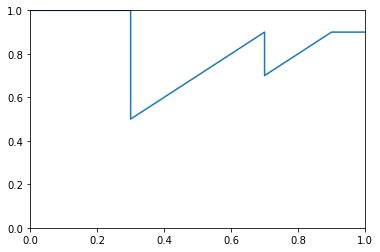

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import random

precision = [1.0,1.0,1.0,1.0,0.9,0.8,0.7,0.6,0.5,0.6,0.7,0.8,0.9,0.8,0.7,0.8,0.9,0.9]
recall = [0.0,0.1,0.2,0.3,0.3,0.3,0.3,0.3,0.3,0.4,0.5,0.6,0.7,0.7,0.7,0.8,0.9,1.0]
PR = []
# for i in range(100):
#     precision.append((100 - i + random.randint(-10, 10)) / 100)
#     recall.append(i / 100)
#     PR.append((precision, recall))

# PR = np.array(PR)
fig = plt.figure()
ax = fig.add_subplot(111)
line = plt.Line2D(recall, precision)
ax.add_line(line)
plt.show()

In [62]:
(0.75*0.5 + 0.69*0.55+ 0.65*0.6+ 0.62*0.65+ 0.6*0.7+ 0.54*0.75+ 0.47*0.8+ 0.41*0.85+ 0.34*0.9+ 0.31*0.95) / (0.5+0.55+0.6+0.65+0.7+0.75+0.8+0.85+0.9+0.95)
# 0.5+0.55+0.6+0.65+0.7+0.75+0.8+0.85+0.9+0.95

0.51

In [81]:
A = (0.75+0.69+0.65+0.62+0.6+0.54+0.47+0.41+0.34+0.31)/10
G = (0.75*0.69*0.65*0.62*0.6*0.54*0.47*0.41*0.34*0.31)**(1.0/10)
H = ((0.75**-1+0.69**-1+0.65**-1+0.62**-1+0.6**-1+0.54**-1+0.47**-1+0.41**-1+0.34**-1+0.31**-1)/10)**-1
print(A,G,H)

0.538 0.5173069028570152 0.4953889477786847
